<a href="https://colab.research.google.com/github/J-o-y-y/data_visualization_2023_sep./blob/main/20230918_%EC%82%BC%EC%A0%842023Aug_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%97%B0%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주가데이터 크롤링 데이터수집,시각화 프로젝트

8월 한달간
삼성전자
주가
크롤링하여
stock.csv
파일로저장
(https://finance.naver.com/item/sise.nhn?code=005930)

**(전일비 숫자출력되게 수정)**

In [2]:
import requests
import re
from bs4 import BeautifulSoup
import csv

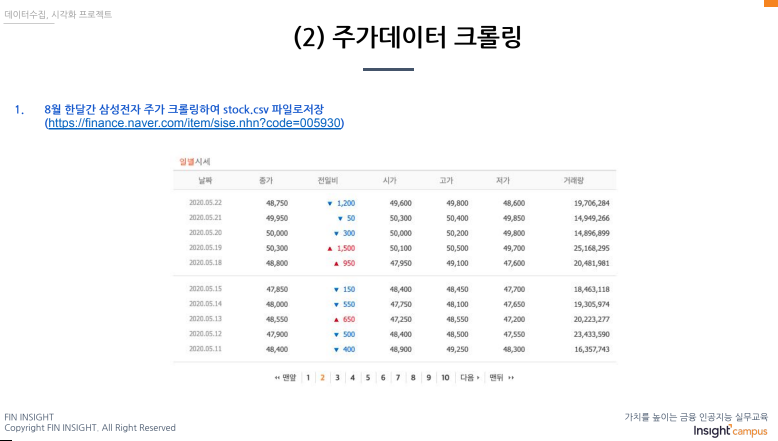

In [3]:
file = open("005930.csv", mode="w", encoding="utf-8", newline="")
writer = csv.writer(file)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}

writer.writerow(['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'])

for page in range(2, 5):
    params = {
        'code': '005930',
        'page': page
    }
    res = requests.get('https://finance.naver.com/item/sise_day.naver', headers=headers, params=params)
    sams = BeautifulSoup(res.text, 'html.parser')

    for tr in sams.select('table.type2 > tr'):
        temp = []

        if tr.attrs != {}:
            date = tr.select('td')[0].text.strip()

            if re.match('2023.08', date):
                temp.append(date)
                temp.append(tr.select('td')[1].text)

                previous_day_change = tr.select('td')[2].text
                change_only = re.search(r'[-+]?\d+', previous_day_change).group()
                temp.append(change_only)

                temp.append(tr.select('td')[3].text)
                temp.append(tr.select('td')[4].text)
                temp.append(tr.select('td')[5].text)
                temp.append(tr.select('td')[6].text)

                print(temp)
                writer.writerow(temp)

file.close()

['2023.08.31', '66,900', '200', '67,100', '67,200', '66,400', '15,964,630']
['2023.08.30', '67,100', '300', '67,300', '67,700', '67,100', '9,181,223']
['2023.08.29', '66,800', '0', '66,900', '67,200', '66,600', '9,114,352']
['2023.08.28', '66,800', '300', '66,800', '67,000', '66,500', '5,824,628']
['2023.08.25', '67,100', '1', '67,100', '67,400', '66,900', '7,032,462']
['2023.08.24', '68,200', '1', '68,300', '68,700', '67,900', '15,044,463']
['2023.08.23', '67,100', '500', '66,700', '67,100', '66,400', '9,549,352']
['2023.08.22', '66,600', '0', '67,200', '67,700', '66,300', '10,500,242']
['2023.08.21', '66,600', '300', '66,600', '67,100', '66,300', '9,720,067']
['2023.08.18', '66,300', '400', '66,000', '66,700', '65,800', '11,745,006']
['2023.08.17', '66,700', '300', '66,300', '66,800', '66,000', '10,778,652']
['2023.08.16', '67,000', '300', '66,700', '67,100', '66,300', '13,174,578']
['2023.08.14', '67,300', '200', '67,500', '67,900', '66,900', '9,352,343']
['2023.08.11', '67,500', '5